In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
import numpy as np

In [2]:

results = pd.read_csv('results.csv', index_col=None)
for name in ['_no_block', '_cbh', '_degree', '_random']:
    results['total' + name] = sum(results[str(i)+name] for i in range(1, 4)).subtract(20) 
# sns.set()
results = results[results.seed_size == 20]
results.head()


,network_name,threshold,seed_size,budget_total,0_no_block,1_no_block,2_no_block,3_no_block,0_cbh,1_cbh,...,2_degree,3_degree,0_random,1_random,2_random,3_random,total_no_block,total_cbh,total_degree,total_random
39,fb-pages-politician,2,20,29,889.0,0.0,0.0,5019.0,909.5,4.5,...,60.4,4845.2,889.0,15.1,30.5,4973.4,4999.0,4978.5,4885.6,4999.0
40,fb-pages-politician,2,20,59,889.0,0.0,0.0,5019.0,936.2,0.6,...,65.0,4772.9,889.4,36.3,72.0,4910.3,4999.0,4951.8,4817.9,4998.6
41,fb-pages-politician,2,20,118,889.0,0.0,0.0,5019.0,950.5,1.0,...,143.5,4659.1,890.7,50.7,128.2,4838.4,4999.0,4937.5,4782.6,4997.3
42,fb-pages-politician,2,20,177,889.0,0.0,0.0,5019.0,955.4,0.0,...,273.8,4552.6,891.1,41.7,199.5,4775.7,4999.0,4932.6,4806.4,4996.9
43,fb-pages-politician,2,20,236,889.0,0.0,0.0,5019.0,2029.4,1.2,...,239.6,4457.2,896.8,105.9,260.7,4644.6,4999.0,3858.6,4676.8,4991.2


In [3]:
for i in range(results.shape[0]):
    if results.iloc[i,0] == "astroph":
        results.iloc[i, 3] /= 17903
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 17903
    elif results.iloc[i,0] == "fb-pages-politician":
        results.iloc[i, 3] /= 5908
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 5908
    elif results.iloc[i,0] == "wiki":
        results.iloc[i, 3] /= 7066
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 7066
    

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


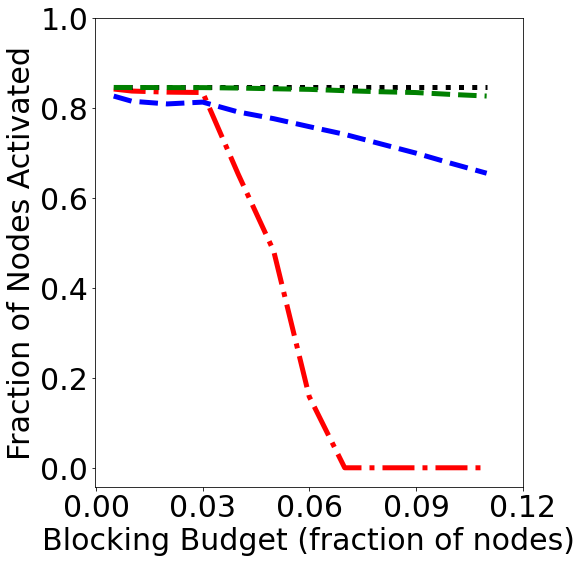

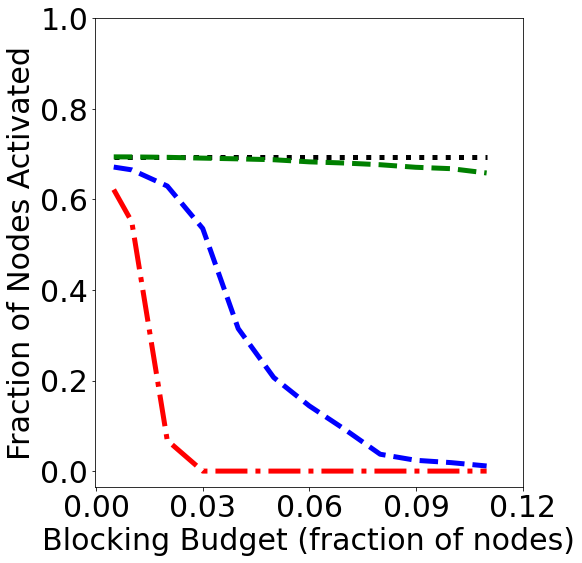

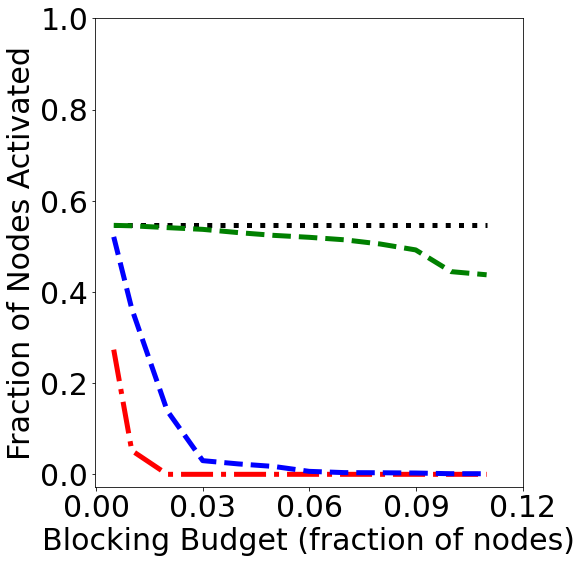

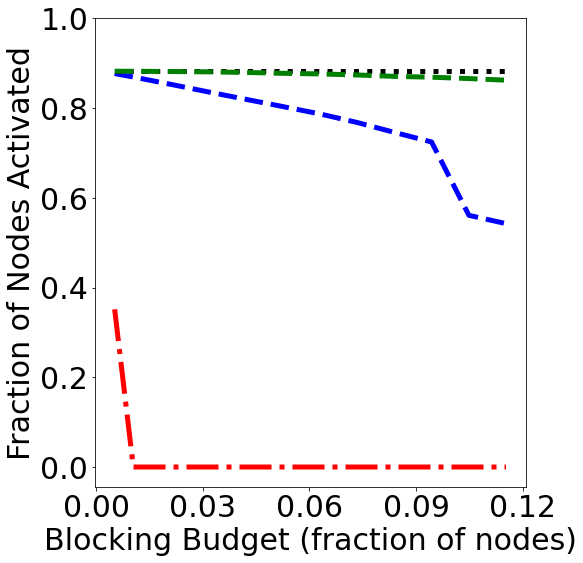

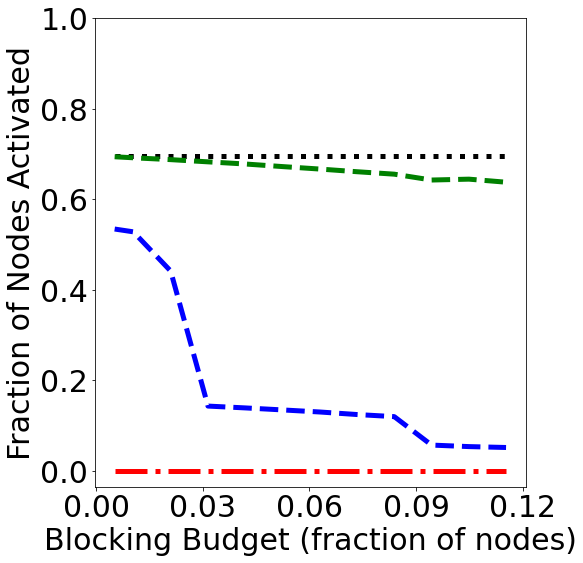

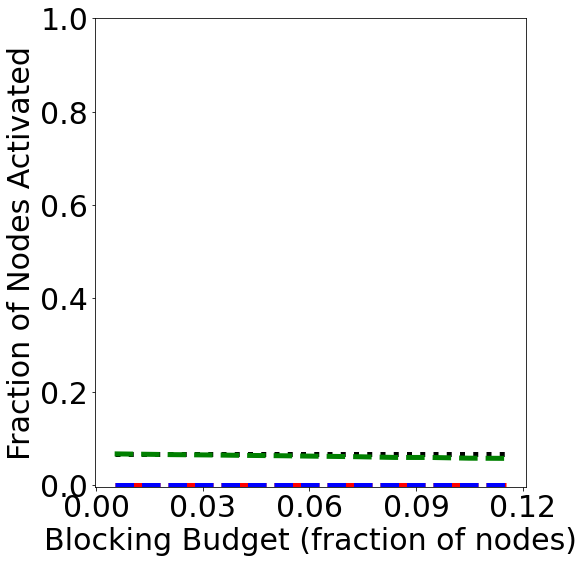

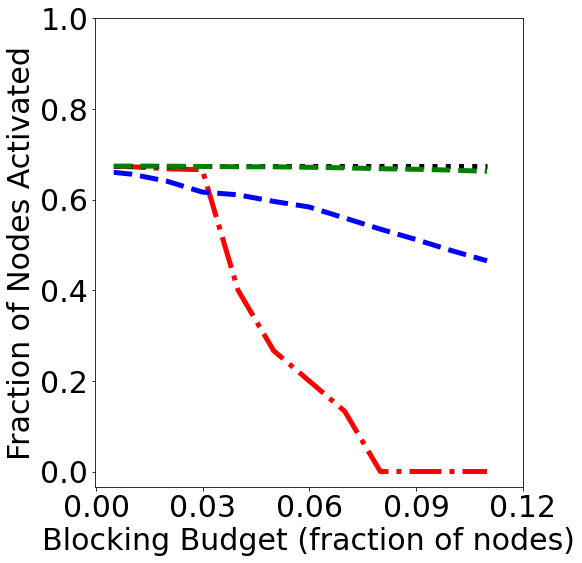

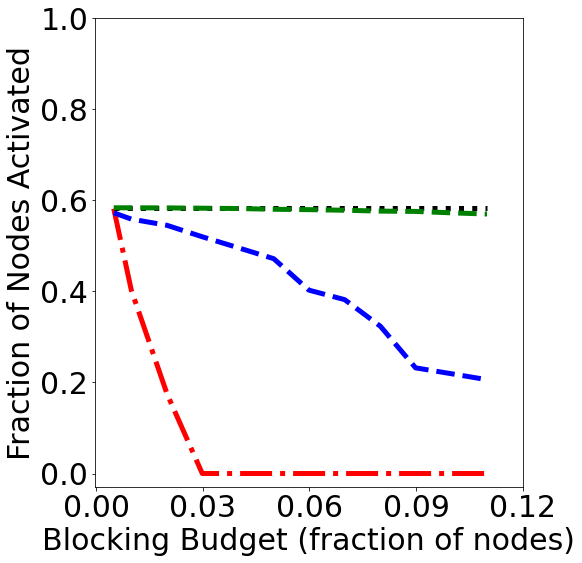

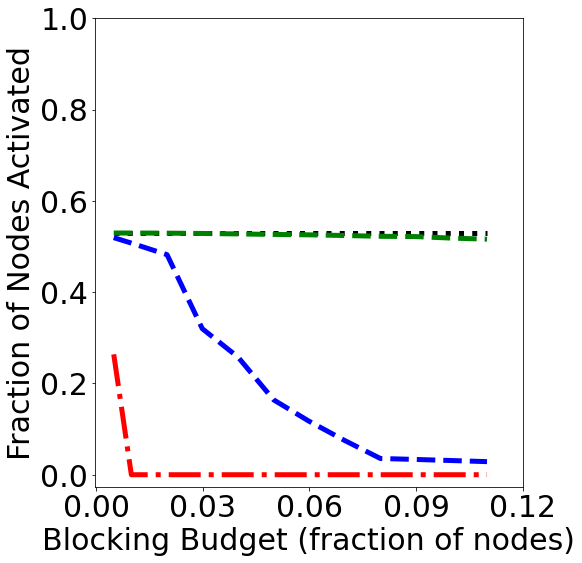

In [4]:


names = ['fb-pages-politician','astroph', 'wiki']
thres = [2, 3, 4]

font = {'family' : 'normal',
        'size'   : 30}
fontP = FontProperties(size=16)
plt.rc('font', **font)


for name in names:
    threshold = results[results.network_name == name]
#        threshold = threshold[threshold.seed_size == 10]
    for i in range(len(thres)):
        fig, ax = plt.subplots(figsize=(8, 8))
        subdf = threshold[threshold.threshold == thres[i]]
        cbh, = ax.plot(list(subdf.budget_total)[:-1], list(subdf.total_cbh)[:-1], 'r-.', linewidth=5)
        degree, = ax.plot(list(subdf.budget_total)[:-1], list(subdf.total_degree)[:-1], 'b--', linewidth=5)
        no_block, = ax.plot(list(subdf.budget_total)[:-1], list(subdf.total_no_block)[:-1], 'k:', linewidth=5)
        random, = ax.plot(list(subdf.budget_total)[:-1], list(subdf.total_random)[:-1],'g--', linewidth=5)
        ax.set_xticks(np.arange(0, .13, .03))
        ax.set_yticks(np.arange(0, 1.1, .2))
        fig.tight_layout(pad=1)
#         fig.legend([cbh, degree, no_block, random], ['MCICH', "High Degree", "No Blocking", "Random"], bbox_to_anchor=(1.05, 1),   borderaxespad= 1, loc='center right', prop=fontP)
#         ax.set_title(name + " Fraction Infected", pad=2)
#         if name == 'fb-pages-politician':
#             ax.set_title("fb-poli Fraction Infected", pad=2)
        ax.set_xlabel("Blocking Budget (fraction of nodes)")
        ax.set_ylabel("Fraction of Nodes Activated")
#         ax.yaxis.set_ticks_position("right")
#         ax.yaxis.set_label_position("right")
        plt.savefig("plots/" + name + "_thres_" + str(thres[i]) + ".pdf", bbox_inches="tight")

In [5]:
saved_per_blocking = (results['total_no_block'] - results['total_cbh']) / results['budget_total']
saved_per_blocking
np.mean(saved_per_blocking)

13.922145795312721

In [7]:
# Here we produce the epi-curves
epi_info = pd.read_csv('epi_curve_results.csv')
epi_info['time'] -= 1
epi_info['newly_infected'] = -epi_info['state_0']
epi_info


,time,threshold,blocking,state_0,state_1,state_2,state_3,newly_infected
0,1,2,no_block,-147,92,11,44,147
1,2,2,no_block,-710,111,50,549,710
2,3,2,no_block,-632,40,-33,625,632
3,4,2,no_block,-1297,320,-14,991,1297
4,5,2,no_block,-1204,-113,-4,1321,1204
...,...,...,...,...,...,...,...,...
18942,19,4,random,-38,0,38,0,38
18943,20,4,random,-20,0,20,0,20
18944,21,4,random,-10,0,10,0,10
18945,22,4,random,-1,0,1,0,1


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


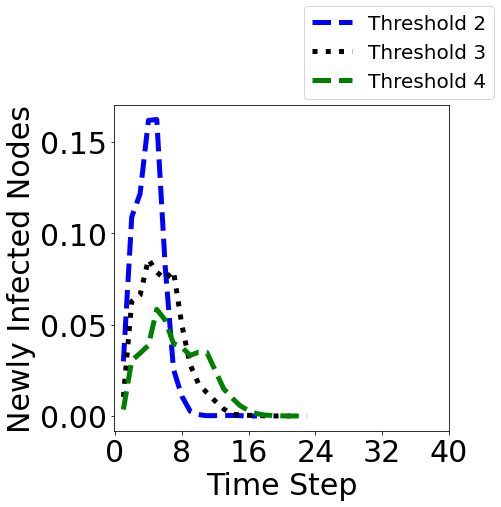

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
method_name = epi_info['blocking'].unique()
fontP = FontProperties(size=20)
plots = []
symbols = ['r-.', 'b--', 'k:', 'g--']
method = "no_block"
for threshold in [2,3,4]:
#     method = method_name[i]
    sub_epi = epi_info[(epi_info.blocking == method) & (epi_info.threshold == threshold)]
    avg = sub_epi[['time', 'newly_infected']].groupby('time').mean()['newly_infected']
    avg /= 7066
    times = sub_epi['time'].unique()
    cumsum = avg.cumsum()
    missing_time = np.setdiff1d(epi_info.time.unique(),times)
    saturation_point = cumsum.max()
    saturation = pd.Series([saturation_point for time in missing_time])
    filled_in_times = np.append(times, missing_time)
    cumsum = pd.concat([cumsum, saturation])
    plot, = ax.plot(times, avg, symbols[threshold - 1], linewidth=5)
    plots.append(plot)
ax.set_xticks(np.arange(0, epi_info.time.max()+ 1, 8))
# ax.set_yticks(np.arange(0, avg.max()+ 1, avg.max() // 5))
ax.set_xlabel('Time Step')
ax.set_ylabel("Newly Infected Nodes")
# ax.set_title("Epidemic Curves")
fig.legend(plots, ['Threshold ' + str(i) for i in [2,3,4]], bbox_to_anchor=(1.05, 1),   borderaxespad= 1, loc='center right', prop=fontP)
plt.savefig("plots/epi_curve_no_block.pdf", bbox_inches="tight")

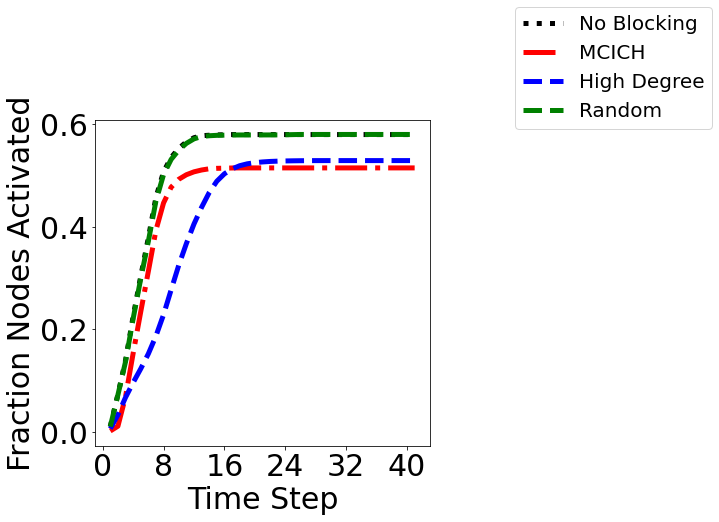

In [10]:
fig2, ax2 = plt.subplots(figsize=(6, 6))
# method_name = epi_info['blocking'].unique()
plots = []
plots2 = []
symbols = ['k:', 'r-.','b--',  'g--']
labels = [ "No Blocking", 'MCICH', "High Degree", "Random"]
method_name = ['no_block', 'mcich', 'degree', 'random']
for i in range(len(method_name)):
    method = method_name[i]
    sub_epi = epi_info[(epi_info.blocking == method) & (epi_info.threshold == 3)]
    avg = sub_epi[['time', 'newly_infected']].groupby('time').mean()['newly_infected']
    avg /= 7066
    times = sub_epi['time'].unique()
    cumsum = avg.cumsum()
    missing_time = np.setdiff1d(epi_info.time.unique(),times)
    saturation_point = cumsum.max()
    saturation = pd.Series([saturation_point for time in missing_time])
    filled_in_times = np.append(times, missing_time)
    cumsum = pd.concat([cumsum, saturation])
    plot2, = ax2.plot(filled_in_times, cumsum, symbols[i], linewidth=5)
    plots2.append(plot2)
ax2.set_xticks(np.arange(0, epi_info.time.max()+ 1, 8))
# ax.set_yticks(np.arange(0, avg.max()+ 1, avg.max() // 5))
ax2.set_xlabel("Time Step")
ax2.set_ylabel("Fraction Nodes Activated")
# ax2.set_title("Cumulative Infected")
fig2.legend(plots2, labels, bbox_to_anchor=(1.05, 1),   borderaxespad= 1, loc='center left', prop=fontP)
plt.savefig("plots/cum_curve_blocking.pdf", bbox_inches="tight")

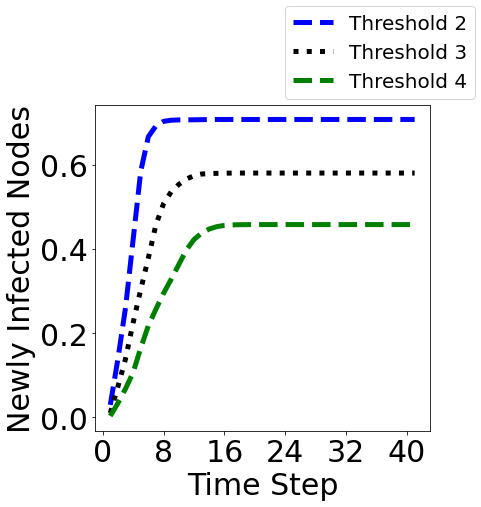

In [76]:
fig, ax = plt.subplots(figsize=(6, 6))
method_name = epi_info['blocking'].unique()
fontP = FontProperties(size=20)
plots = []
symbols = ['r-.', 'b--', 'k:', 'g--']
method = "no_block"
for threshold in [2,3,4]:
#     method = method_name[i]
    sub_epi = epi_info[(epi_info.blocking == method) & (epi_info.threshold == threshold)]
    avg = sub_epi[['time', 'newly_infected']].groupby('time').mean()['newly_infected']
    avg /= 7066
    times = sub_epi['time'].unique()
    cumsum = avg.cumsum()
    missing_time = np.setdiff1d(epi_info.time.unique(),times)
    saturation_point = cumsum.max()
    saturation = pd.Series([saturation_point for time in missing_time])
    filled_in_times = np.append(times, missing_time)
    cumsum = pd.concat([cumsum, saturation])
    plot, = ax.plot(filled_in_times, cumsum, symbols[threshold - 1], linewidth=5)
    plots.append(plot)
ax.set_xticks(np.arange(0, epi_info.time.max()+ 1, 8))
# ax.set_yticks(np.arange(0, avg.max()+ 1, avg.max() // 5))
ax.set_xlabel('Time Step')
ax.set_ylabel("Newly Infected Nodes")
# ax.set_title("Epidemic Curves")
fig.legend(plots, ['Threshold ' + str(i) for i in [2,3,4]], bbox_to_anchor=(1.05, 1),   borderaxespad= 1, loc='center right', prop=fontP)
plt.savefig("plots/cum_curve_no_block.pdf", bbox_inches="tight")

In [15]:
results[(results.network_name == 'astroph') & (results.threshold == 4)][['total_no_block']]

,total_no_block
143,0.064552
144,0.064552
145,0.064552
146,0.064552
147,0.064552
148,0.064552
149,0.064552
150,0.064552
151,0.064552
152,0.064552
